In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/odi-batting.csv')
df.head(10)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57
5,Afghanistan,Mohammad Shahzad,55,07-07-2010,Wed,Sportpark Westvliet,Netherlands,63
6,Afghanistan,Mohammad Shahzad,37,09-10-2010,Sat,Gymkhana Club Ground,Kenya,46
7,Afghanistan,Mohammad Shahzad,34,09-07-2010,Fri,Hazelaarweg,Scotland,44
8,Afghanistan,Mohammad Shahzad,20,05-07-2010,Mon,VRA Ground,Kenya,22
9,Afghanistan,Mohammad Shahzad,16,30-08-2009,Sun,VRA Ground,Netherlands,28


In [5]:
df_runs_100_or_more = df[df['Runs'] >= 100]

# Group by 'player_name' and count the occurrences
players_count_runs_100_or_more = df_runs_100_or_more.groupby('Player').size().reset_index(name='count_runs_100_or_more')
players_count_runs_100_or_more = players_count_runs_100_or_more.sort_values(by='count_runs_100_or_more', ascending=False)
players_count_runs_100_or_more

,Player,count_runs_100_or_more
221,Sachin R Tendulkar,48
208,Ricky T Ponting,30
226,Sanath T Jayasuriya,28
242,Sourav C Ganguly,22
101,Herschelle H Gibbs,21
...,...,...
196,Philo A Wallace,1
194,Peter G Fulton,1
109,Imrul Kayes,1
111,Irvine H Romaine,1


In [11]:
df['strike_rate']= (df['Runs']/df['Balls']*100).round()
centuries_data = df[df['Runs'] >= 100]
centuries_data=centuries_data.sort_values(by='strike_rate', ascending=False)
centuries_data

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,strike_rate
28157,Pakistan,Shahid Afridi,102,04-10-1996,Fri,Gymkhana Club Ground,Sri Lanka,40,255.0
28158,Pakistan,Shahid Afridi,102,15-04-2005,Fri,Green Park,India,46,222.0
34446,South Africa,Mark V Boucher,147,20-09-2006,Wed,Senwes Park,Zimbabwe,68,216.0
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,207.0
36753,Sri Lanka,Sanath T Jayasuriya,134,02-04-1996,Tue,Padang Cricket Ground,Pakistan,65,206.0
...,...,...,...,...,...,...,...,...,...
28851,Pakistan,Ramiz Raja,102,23-02-1992,Sun,Melbourne Cricket Ground,West Indies,158,65.0
24821,New Zealand,Glenn M Turner,114,14-06-1975,Sat,Old Trafford,India,177,64.0
43594,West Indies,Cuthbert Gordon Greenidge,103,21-11-1981,Sat,Melbourne Cricket Ground,Pakistan,161,64.0
2141,Australia,David C Boon,102,10-12-1991,Tue,Bellerive Oval,India,168,61.0


In [12]:
df['year'] = df['MatchDate'].str.split('-', expand=True)[2]
df.head(5)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,strike_rate,year
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,98.0,2010
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,99.0,2009
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,139.0,2010
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108,76.0,2010
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57,100.0,2010


In [15]:

indian_players_data = df[df['Country'] == 'India']
centuries_data = indian_players_data[indian_players_data['Runs'] >= 100]
centuries_count_by_year = centuries_data.groupby('year').size()

# Find the year with the maximum number of centuries
max_centuries_year = centuries_count_by_year.idxmax()
f"The year with the maximum number of centuries scored by Indian players is: {max_centuries_year}"


'The year with the maximum number of centuries scored by Indian players is: 1998'

In [36]:
grades=pd.read_csv('/content/grades.csv')
grades.head(10)
grades.columns

Index(['submission', 'submit_time'], dtype='object')

In [37]:
grades['filename'] = grades['submission'].apply(lambda url: url.split("/")[-1])
grades['file_extension'] = grades['filename'].apply(lambda filename: filename.split(".")[-1])
grades

,submission,submit_time,filename,file_extension
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,zip
...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12,DDA1610228.zip,zip
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34,DDA1610200.zip,zip
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13,DDA1610183.zip,zip
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06,DDA1610013.R,R


In [38]:
zip_submission_percentage = (grades['file_extension'].eq('zip').sum() / len(grades)) * 100
zip_submission_percentage.round()

95.0

In [39]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   submission      198 non-null    object
 1   submit_time     198 non-null    object
 2   filename        198 non-null    object
 3   file_extension  198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [ ]:

grades['submit_time'] = pd.to_datetime(grades['submit_time'], format='%m/%d/%y-%H:%M:%S')

# Filter by submitted time greater than or equal to "01/03/17 - 11:59:59"
filtered_df = grades[grades['submit_time'] >'2017-01-03 23:59:59']
filtered_df.info()

In [50]:
grades['timestamp_datetime'] = pd.to_datetime(grades['submit_time'], format='%m/%d/%y-%H:%M:%S')

# Extract the date
grades['submit_date'] = grades['timestamp_datetime'].dt.date
grades

,submission,submit_time,filename,file_extension,timestamp_datetime,submit_date
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,DDA1610095.zip,zip,2017-01-03 20:28:52,2017-01-03
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,DDA1610288.zip,zip,2017-01-03 20:18:21,2017-01-03
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,DDA1610106.zip,zip,2017-01-03 22:37:08,2017-01-03
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,DDA1610261.zip,zip,2017-01-02 21:43:19,2017-01-02
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,DDA1610028.zip,zip,2017-01-03 15:27:49,2017-01-03
...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,2017-01-03 22:43:12,DDA1610228.zip,zip,2017-01-03 22:43:12,2017-01-03
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,2017-01-09 23:59:34,DDA1610200.zip,zip,2017-01-09 23:59:34,2017-01-09
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,2016-12-19 21:44:13,DDA1610183.zip,zip,2016-12-19 21:44:13,2016-12-19
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,2017-01-09 23:23:06,DDA1610013.R,R,2017-01-09 23:23:06,2017-01-09


In [51]:
most_submissions_date = grades['submit_date'].value_counts().idxmax()

f"The date with the most student submissions is: {most_submissions_date}"

'The date with the most student submissions is: 2017-01-03'

In [52]:
grades['timestamp_datetime'] = pd.to_datetime(grades['submit_time'], format='%m/%d/%y %H:%M:%S')

# Extract the hour
grades['submit_hour'] = grades['timestamp_datetime'].dt.hour

# Find the hour with the most submissions
most_submissions_hour = grades['submit_hour'].value_counts().idxmax()

f"The hour of the day with the most student submissions is: {most_submissions_hour} o'clock"

"The hour of the day with the most student submissions is: 23 o'clock"

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

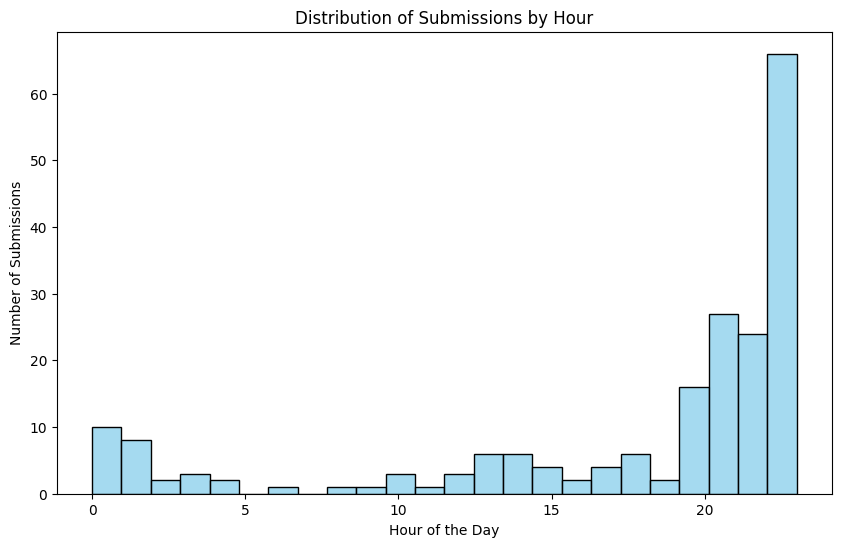

In [54]:
grades['timestamp_datetime'] = pd.to_datetime(grades['submit_time'], format='%m/%d/%y %H:%M:%S')

# Extract the hour
grades['submit_hour'] = grades['timestamp_datetime'].dt.hour

# Plot the distribution of submissions by the hour
plt.figure(figsize=(10, 6))
sns.histplot(grades['submit_hour'], bins=24, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Submissions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Submissions')
plt.show()